In [1]:
# 원본 강수량.csv 파일 불러오기
import pandas as pd
rain=pd.read_csv('강수량.csv',encoding='cp949',low_memory=False)
rain.head()

,\t지점번호,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각,Unnamed: 6
0,184,제주,2011-01-01,2.5,NaN,NaN,NaN
1,184,제주,2011-01-02,NaN,NaN,NaN,NaN
2,184,제주,2011-01-03,0.2,NaN,NaN,NaN
3,184,제주,2011-01-04,2.5,NaN,NaN,NaN
4,184,제주,2011-01-05,NaN,NaN,NaN,NaN


In [2]:
# 데이터 필요 없는 열 제거
rain=rain.dropna(axis=1,how='all')
rain2=rain.drop(['1시간최다강수량시각','강수량(mm)','\t지점번호'],axis=1)
rain2.head()

,지점명,일시,1시간최다강수량(mm)
0,제주,2011-01-01,NaN
1,제주,2011-01-02,NaN
2,제주,2011-01-03,NaN
3,제주,2011-01-04,NaN
4,제주,2011-01-05,NaN


In [3]:
# 비행기 결항 강수량 기준치로 정제 & 년도별로 정제
# 비행기 결항 기준 : 1시간최다강수량(mm) >= 30
rain2=rain2[rain['1시간최다강수량(mm)']>=30.0]
rain2=rain2.replace({'일시':{r'(\d\d\d\d)\-\d\d\-\d\d':r'\1'}},regex=True) # 정규표현식
rain_count=rain2['일시'].value_counts().sort_index()
rain_count

2011    1
2012    5
2014    2
2015    3
2016    1
2017    3
2018    3
2019    5
2020    1
2021    2
2022    1
Name: 일시, dtype: int64

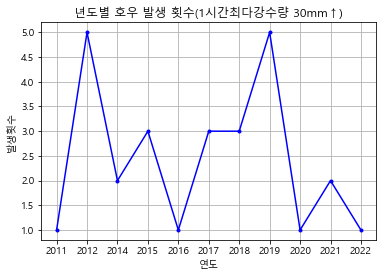

In [4]:
# 호우로 인한 비행기 결항 횟수 그래프
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font',family='Malgun Gothic')
plt.plot(rain_count,marker='.',linestyle='-',color='blue')
plt.title('년도별 호우 발생 횟수(1시간최다강수량 30mm↑)')
plt.xlabel('연도')
plt.ylabel('발생횟수')
plt.grid(True)
plt.savefig ('년도별 호우 발생 횟수.png')

In [5]:
# 원본 눈.csv 파일 불러오기 
# 눈 관련 기상현상은 있었으나 쌓이지 않아 일 최심신적설을 기록하지 못한 경우  [  -  ]  로 표현
import pandas as pd
snow=pd.read_csv('눈.csv',encoding='cp949',low_memory=False)
snow

,연도,날짜,지점,기상현상,일 최심신적설(cm)
0,2011,101,제주,소낙눈,0.8
1,2011,103,제주,소낙성진눈깨비,-
2,2011,104,제주,소낙성진눈깨비,-
3,2011,106,제주,소낙눈 소낙성진눈깨비,-
4,2011,109,제주,소낙눈 소낙성진눈깨비,-
...,...,...,...,...,...
226,2023,1216,제주,소낙눈 싸락눈,-
227,2023,1217,제주,눈 소낙성진눈깨비 싸락눈,-
228,2023,1220,제주,소낙눈 싸락눈,-
229,2023,1221,제주,눈 소낙눈 싸락눈,5.4


In [6]:
# '연도'와 '날짜'를 문자열로 변환
snow['연도'] = snow['연도'].astype(str)
snow['날짜'] = snow['날짜'].astype(str)

# 날짜가 3글자인 경우에만 앞에 0을 추가
snow['날짜'] = snow['날짜'].apply(lambda x: x.zfill(4) if len(x) == 3 else x)

# '날짜'를 MM-DD 형식으로 변환
snow['날짜'] = snow['날짜'].apply(lambda x: x[:2] + '-' + x[2:])

# '연도'와 '날짜'를 결합하여 '연도' 열에 YYYY-MM-DD 형식으로 저장
snow['연도'] = snow['연도'] + '-' + snow['날짜']

# '날짜' 열 삭제
snow = snow.drop(columns=['날짜'])

# '연도' 이름 변경
snow.rename(columns={'연도':'일시'},inplace=True)

snow.head()

,일시,지점,기상현상,일 최심신적설(cm)
0,2011-01-01,제주,소낙눈,0.8
1,2011-01-03,제주,소낙성진눈깨비,-
2,2011-01-04,제주,소낙성진눈깨비,-
3,2011-01-06,제주,소낙눈 소낙성진눈깨비,-
4,2011-01-09,제주,소낙눈 소낙성진눈깨비,-


In [7]:
# 데이터 필요 없는 열 제거
snow2=snow.drop(['기상현상'],axis=1)
snow2.head()

,일시,지점,일 최심신적설(cm)
0,2011-01-01,제주,0.8
1,2011-01-03,제주,-
2,2011-01-04,제주,-
3,2011-01-06,제주,-
4,2011-01-09,제주,-


In [8]:
# 비행기 결항 대설 기준치로 정제 & 년도별로 정제
# 비행기 결항 기준 : 24시간 적설이 3cm 이상 발생

# '일 최심신적설(cm)' 열을 숫자로 변환
snow['일 최심신적설(cm)'] = pd.to_numeric(snow2['일 최심신적설(cm)'], errors='coerce')

snow2=snow2[snow['일 최심신적설(cm)']>=3.0]
snow2=snow2.replace({'일시':{r'(\d\d\d\d)\-\d\d\-\d\d':r'\1'}},regex=True) # 정규표현식
snow_count=snow2['일시'].value_counts().sort_index()
snow_count

2011    1
2012    2
2016    2
2018    5
2021    3
2023    3
Name: 일시, dtype: int64

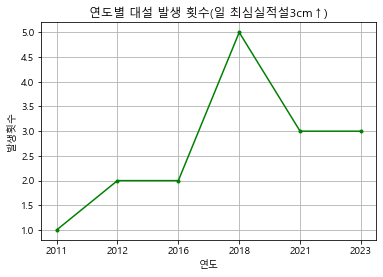

In [9]:
# 대설로 인한 비행기 결항 횟수 그래프
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font',family='Malgun Gothic')
plt.plot(snow_count,marker='.',linestyle='-',color='green')
plt.title('연도별 대설 발생 횟수(일 최심실적설3cm↑)')
plt.xlabel('연도')
plt.ylabel('발생횟수')
plt.grid(True)
plt.savefig ('년도별 대설 발생 횟수.png')

In [10]:
# 원본 바람.csv 파일 불러오기
import pandas as pd
wind=pd.read_csv('바람.csv',encoding='cp949',index_col=False,low_memory=False)
wind

,\t\t지점번호,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속시각
0,184,제주,2011-01-01,7.0,12.1,320,05:23,19.6,320,01:27
1,184,제주,2011-01-02,4.7,6.5,340,23:12,10.4,160,22:28
2,184,제주,2011-01-03,5.2,6.6,320,16:45,10.7,340,05:29
3,184,제주,2011-01-04,5.4,7.7,320,04:55,12.1,360,06:19
4,184,제주,2011-01-05,5.7,8.0,320,16:38,13.6,340,15:57
...,...,...,...,...,...,...,...,...,...,...
4743,184,제주,2023-12-27,1.9,3.4,50,13:24,5.2,70,13:22
4744,184,제주,2023-12-28,2.9,5.5,20,21:01,8.7,50,21:01
4745,184,제주,2023-12-29,2.6,4.5,20,03:30,7.4,20,03:25
4746,184,제주,2023-12-30,2.1,5.2,250,22:44,9.2,250,22:44


In [11]:
# 데이터 필요 없는 열 제거
wind2=wind.drop(['\t\t지점번호','평균풍속(m/s)','최대풍속풍향(deg)','\t최대풍속시각','최대순간풍속풍향(deg)','\t최대순간풍속시각','최대풍속(m/s)'],axis=1)
wind2.head()

,지점명,일시,최대순간풍속(m/s)
0,제주,2011-01-01,19.6
1,제주,2011-01-02,10.4
2,제주,2011-01-03,10.7
3,제주,2011-01-04,12.1
4,제주,2011-01-05,13.6


In [12]:
# 비행기 결항 풍속 기준치로 정제 & 년도별로 정제
# 비행기 결항 기준 : 최대 순간 풍속 >= 18.005556m/s
wind2=wind[wind['최대순간풍속(m/s)']>=18.005556]
wind2=wind2.replace({'일시':{r'(\d\d\d\d)\-\d\d\-\d\d':r'\1'}},regex=True) # 정규표현식
wind_count=wind2['일시'].value_counts().sort_index()
wind_count

2011    12
2012    23
2013    10
2014    16
2015    12
2016    26
2017     8
2018    18
2019    13
2020    18
2021    18
2022    19
2023    24
Name: 일시, dtype: int64

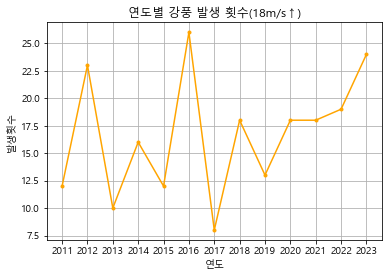

In [13]:
# 강풍으로 인한 비행기 결항 횟수 그래프
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font',family='Malgun Gothic')
plt.plot(wind_count,marker='.',linestyle='-',color='orange')
plt.title('연도별 강풍 발생 횟수(18m/s↑)')
plt.xlabel('연도')
plt.ylabel('발생횟수')
plt.grid(True)
plt.savefig ('년도별 강풍 발생 횟수.png')

In [14]:
# 대설, 강수, 강풍으로 인한 비행기 결항 날짜가 같은 경우 중복으로 처리

rain_cancel=rain.drop(['1시간최다강수량시각','강수량(mm)','\t지점번호'],axis=1)[rain['1시간최다강수량(mm)']>=30.0]
print(rain_cancel.head())

snow_cancel=snow.drop(['기상현상'],axis=1)[snow['일 최심신적설(cm)']>=3.0]
print(snow_cancel.head())

wind_cancel=wind.drop(['\t\t지점번호','평균풍속(m/s)','최대풍속풍향(deg)','\t최대풍속시각','최대순간풍속풍향(deg)','\t최대순간풍속시각','최대풍속(m/s)'],axis=1)\
[wind['최대순간풍속(m/s)']>=18.005556]
wind_cancel

    지점명          일시  1시간최다강수량(mm)
218  제주  2011-08-07          39.5
563  제주  2012-07-17          41.8
604  제주  2012-08-27          57.8
605  제주  2012-08-28          41.5
624  제주  2012-09-16          34.5
             일시  지점  일 최심신적설(cm)
12   2011-01-30  제주          5.1
36   2012-02-02  제주          5.2
39   2012-02-08  제주          3.9
109  2016-01-23  제주         12.0
110  2016-01-24  제주          3.8


,지점명,일시,최대순간풍속(m/s)
0,제주,2011-01-01,19.6
14,제주,2011-01-15,21.3
42,제주,2011-02-12,19.8
115,제주,2011-04-26,19.4
119,제주,2011-04-30,28.3
...,...,...,...
4732,제주,2023-12-16,21.0
4733,제주,2023-12-17,18.6
4737,제주,2023-12-21,20.6
4738,제주,2023-12-22,19.4


In [15]:
# 데이터프레임들을 병합하여 공통된 날짜 찾기
m_rain_snow=rain_cancel.merge(snow_cancel, on='일시') 
m_rain_wind=rain_cancel.merge(wind_cancel, on='일시')
m_snow_wind=snow_cancel.merge(wind_cancel, on='일시')
m_rain_snow_wind=rain_cancel.merge(snow_cancel, on='일시').merge(wind_cancel, on='일시')

print(m_rain_snow)
print(m_rain_wind)
print(m_snow_wind)
print(m_rain_snow_wind)

Empty DataFrame
Columns: [지점명, 일시, 1시간최다강수량(mm), 지점, 일 최심신적설(cm)]
Index: []
  지점명_x          일시  1시간최다강수량(mm) 지점명_y  최대순간풍속(m/s)
0    제주  2011-08-07          39.5    제주         30.8
1    제주  2012-08-27          57.8    제주         33.4
2    제주  2012-08-28          41.5    제주         37.5
3    제주  2012-09-17          42.2    제주         30.4
4    제주  2016-10-05          51.7    제주         47.0
5    제주  2018-08-23          36.6    제주         32.2
6    제주  2018-10-05          48.8    제주         26.3
7    제주  2019-10-02          38.7    제주         18.1
8    제주  2021-09-17          71.7    제주         24.2
           일시  지점  일 최심신적설(cm) 지점명  최대순간풍속(m/s)
0  2016-01-23  제주         12.0  제주         20.4
1  2016-01-24  제주          3.8  제주         24.1
2  2018-02-04  제주          3.7  제주         20.4
3  2021-12-26  제주          4.4  제주         20.3
4  2023-01-27  제주          3.7  제주         19.6
5  2023-12-21  제주          5.4  제주         20.6
6  2023-12-22  제주          8.3  제주         19.4
Empty Data

In [16]:
# 중복일자 년도 형식으로 변환
m_rain_wind2=m_rain_wind.drop(['지점명_x','1시간최다강수량(mm)', '지점명_y' , '최대순간풍속(m/s)'],axis=1)
m_rain_wind2=m_rain_wind2.replace({'일시':{r'(\d\d\d\d)\-\d\d\-\d\d':r'\1'}},regex=True) # 정규표현식
m_rain_wind2_cnt=m_rain_wind2['일시'].value_counts().sort_index()
print(m_rain_wind2_cnt)

m_snow_wind2=m_snow_wind.drop(['지점', '일 최심신적설(cm)', '지점명' , '최대순간풍속(m/s)'],axis=1)
m_snow_wind2=m_snow_wind2.replace({'일시':{r'(\d\d\d\d)\-\d\d\-\d\d':r'\1'}},regex=True) # 정규표현식
m_snow_wind2_cnt=m_snow_wind2['일시'].value_counts().sort_index()
m_snow_wind2_cnt

2011    1
2012    3
2016    1
2018    2
2019    1
2021    1
Name: 일시, dtype: int64


2016    2
2018    1
2021    1
2023    3
Name: 일시, dtype: int64

In [17]:
# 년도별 눈, 강수, 풍속 비행기 결항 횟수 결합(중복 일자 제거)

combined_series = snow_count.add(rain_count, fill_value=0).add(wind_count, fill_value=0)

result_series = combined_series.copy()  # 원본을 변경하지 않기 위해 복사

# 중복 일자 제거
result_series = result_series.subtract(m_rain_wind2_cnt, fill_value=0)
result_series = result_series.subtract(m_snow_wind2_cnt, fill_value=0)

# NaN 값을 원본 데이터로 대체
flight_cancel_cnt = result_series.combine_first(combined_series)

# 결과 출력
print(flight_cancel_cnt)

2011    13.0
2012    27.0
2013    10.0
2014    18.0
2015    15.0
2016    26.0
2017    11.0
2018    23.0
2019    17.0
2020    19.0
2021    21.0
2022    20.0
2023    24.0
Name: 일시, dtype: float64


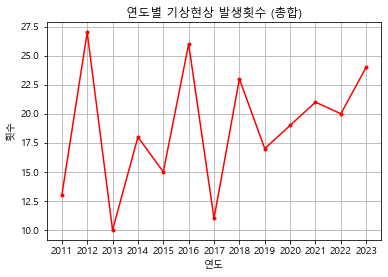

In [18]:
# 연도별 3가지 기상현상 발생횟수의 총합
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font',family='Malgun Gothic')
plt.plot(flight_cancel_cnt,marker='.',linestyle='-',color='red')
plt.title('연도별 기상현상 발생횟수 (총합)')
plt.xlabel('연도')
plt.ylabel('횟수')
plt.grid(True)
plt.savefig ('년도별 기상현상 발생 횟수.png')

In [19]:
# 년도별 눈, 강수, 풍속 비행기 결항 횟수 결합(중복 일자 제거)

combined_series = snow_count.add(rain_count, fill_value=0).add(wind_count, fill_value=0)

result_series = combined_series.copy()  # 원본을 변경하지 않기 위해 복사

# 중복 일자 제거
result_series = result_series.subtract(m_rain_wind2_cnt, fill_value=0)
result_series = result_series.subtract(m_snow_wind2_cnt, fill_value=0)

# NaN 값을 원본 데이터로 대체
flight_cancel_cnt = result_series.combine_first(combined_series)

# 결과 출력
print(flight_cancel_cnt)

2011    13.0
2012    27.0
2013    10.0
2014    18.0
2015    15.0
2016    26.0
2017    11.0
2018    23.0
2019    17.0
2020    19.0
2021    21.0
2022    20.0
2023    24.0
Name: 일시, dtype: float64


In [20]:
# 비행기 결항률 데이터 불러오기
flight_cancel=pd.read_csv('결항통계_월별(2005~2023).csv',encoding='cp949')
flight_cancel.head()

,공항별(1),결항원인별(1),결항원인별(2),2005.01,2005.02,2005.03,2005.04,2005.05,2005.06,2005.07,...,2023.03,2023.04,2023.05,2023.06,2023.07,2023.08,2023.9,2023.1,2023.11,2023.12
0,제주,운항,소계,5975,5253,5823,5960,6266,5593,5840,...,13684,13343,13809,13715,13932,14014,13803,14674,13653,13611
1,제주,결항,기상,36,164,58,92,31,20,17,...,24,258,272,48,114,138,12,0,31,521


In [21]:
# 데이터 정제 (필요없는 열 삭제)
flight_cancel=flight_cancel.drop(['공항별(1)','결항원인별(1)','결항원인별(2)'],axis=1)

In [22]:
# 월 단위 년도별로 합산 & 2011 ~ 2023년만 추출
flight_cancel.columns = flight_cancel.columns.str[:4]

# 연도별로 데이터를 그룹화하여 합산
flight_cancel_year = flight_cancel.groupby(flight_cancel.columns, axis=1).sum()

# 2011 ~ 2023년만 추출
flight_cancel_11=flight_cancel_year.drop(['2005','2006','2007','2008','2009','2010'],axis=1)
flight_cancel_11

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,107721,112065,120893,138309,154575,169377,163678,164288,170854,122457,148762,158824,163123
1,447,1147,353,1062,678,1740,245,1447,1475,773,1088,1226,1729


In [23]:
# 비행기 결항 데이터 시리즈로 변환
flight_cancel_series = flight_cancel_11.iloc[1].squeeze()
flight_cancel_series

2011     447
2012    1147
2013     353
2014    1062
2015     678
2016    1740
2017     245
2018    1447
2019    1475
2020     773
2021    1088
2022    1226
2023    1729
Name: 1, dtype: int64

In [24]:
# 년도별 운항횟수 + 결항 횟수
total_flights=flight_cancel_11.sum(axis=0)
total_flights

# 년도별 총 항공편 결항률 
cancellation_rate = pd.DataFrame({
    'cancel': flight_cancel_series,  # 결항 횟수
    'flight': total_flights   # 총 항공편 수
})
# 비율 계산
cancellation_rate['결항률'] = (cancellation_rate['cancel'] / cancellation_rate['flight']) * 100

# 소수점 세 자리까지 출력
cancellation_rate['결항률'] = cancellation_rate['결항률'].round(3)

# 'cancel' , 'flight' 열 제거 
cancellation_rate11=cancellation_rate.drop(['cancel','flight'],axis=1)

# 결과 
cancellation_rate11

,결항률
2011,0.413
2012,1.013
2013,0.291
2014,0.762
2015,0.437
2016,1.017
2017,0.149
2018,0.873
2019,0.856
2020,0.627


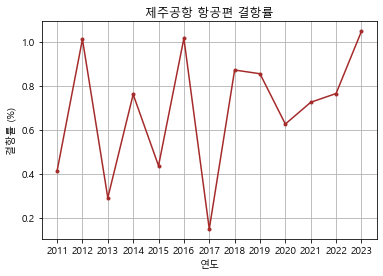

In [25]:
# 기상으로 인한 비행기 결항 횟수 그래프
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font',family='Malgun Gothic')
plt.plot(cancellation_rate11,marker='.',linestyle='-',color='brown')
plt.title('제주공항 항공편 결항률')
plt.xlabel('연도')
plt.ylabel('결항률 (%)')
plt.grid(True)
plt.savefig ('제주공항 항공편 결항률.png')

공분산: 1.48
상관계수: 0.93
P-value: 0.0000
                            OLS Regression Results                            
Dep. Variable:         weather_cancel   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     70.29
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           4.17e-06
Time:                        10:15:41   Log-Likelihood:                -27.038
No. Observations:                  13   AIC:                             58.08
Df Residuals:                      11   BIC:                             59.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
c

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


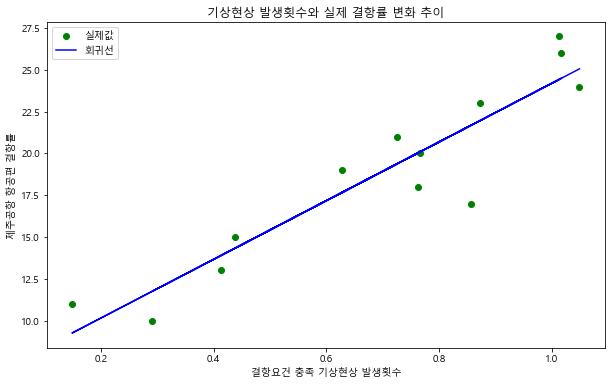

In [26]:
# 제주공항 기상현상으로 인한 결항과 제주도 결항률의 상관관계 분석
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

data2 = {
    'cancellation_rate': [0.413, 1.013, 0.291, 0.762, 0.437, 1.017, 0.149, 0.873, 0.856, 0.627, 0.726, 0.766, 1.049],  
    'weather_cancel': [13.0, 27.0, 10.0, 18.0, 15.0, 26.0, 11.0, 23.0, 17.0, 19.0, 21.0, 20.0, 24.0]  
}

df2 = pd.DataFrame(data2)

x= df2['cancellation_rate']
y = df2['weather_cancel']

# 상관계수, 공분산 - 두 변수 상관 정도 + p-value
print('공분산: {:.2f}'.format(np.cov(x,y)[0,1])) # -48.53
print('상관계수: {:.2f}'.format(stats.pearsonr(x,y)[0])) # -0.9
# -1 < (상관계수) < 1 
# => 1에 가까울 수록 강한 양의 상관관계
# => -1에 가까울 수록 강한 음의 상관관계
print('P-value: {:.4f}'.format(stats.pearsonr(x,y)[1])) # 0.0003

# 가설 검증
x2= sm.add_constant(x) # 절편 만들기 

m2 = sm.OLS(y, x2).fit()

print(m2.summary())

# 한글 폰트
# font_path='NanumGothic.ttf' 
# font_name=font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font_name) 

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(df2['cancellation_rate'], df2['weather_cancel'], color='green', label='실제값')
plt.plot(df2['cancellation_rate'], m2.fittedvalues, color='blue', label='회귀선')
plt.xlabel('결항요건 충족 기상현상 발생횟수')
plt.ylabel('제주공항 항공편 결항률')
plt.title('기상현상 발생횟수와 실제 결항률 변화 추이')
plt.legend()
plt.show()

In [27]:
import pandas as pd

# 2011~2019 년도 데이터
F1=pd.read_csv('여객선 수송(2011~2019).csv',encoding='cp949',low_memory=False)


# 데이터 정제
F2=F1.T
F3=F2.rename(columns=F2.iloc[0])
F4=F3.reset_index().drop([0],axis=0)
F5=F4.rename(columns={'index':'연도'})
F6=F5.drop(columns='여객선별')
F7=F6.astype({'연안여객선':'int32'})
F7

,연도,연안여객선
1,2011,2807643
2,2012,2746394
3,2013,2919362
4,2014,2335213
5,2015,2487715
6,2016,2607630
7,2017,3181825
8,2018,2489249
9,2019,2797526


In [28]:
# 2014~2023 년도 데이터
E1=pd.read_csv('여객선 수송2(2014~2023).csv',encoding='utf-8',low_memory=False)


# 데이터 정제
E2=E1.T
E3=E2.rename(columns=F2.iloc[0])
E4=E3.reset_index().drop([0],axis=0)
E5=E4.rename(columns={'index':'연도'})
E6=E5.drop(columns='여객선별')
E7=E6.astype({'연안여객선':'int32'})
E7

,연도,연안여객선
1,2014,1255261
2,2015,1560073
3,2016,1630941
4,2017,2112974
5,2018,1566178
6,2019,1943010
7,2020,1305745
8,2021,1588287
9,2022,2207595
10,2023,1871743


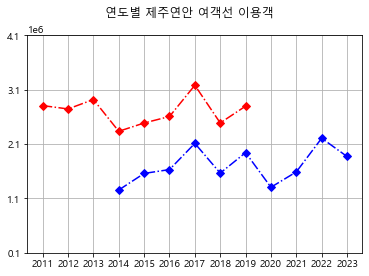

In [29]:
# 시각화 1

fig2 = plt.figure()
fig2.suptitle("연도별 제주연안 여객선 이용객")
axes2 = fig2.add_subplot(111)

x=F7['연도']
x1=E7['연도']

y=F7['연안여객선']
y1=E7['연안여객선']


axes2.plot(x,y,color='r',marker='D',linestyle='dashdot')
axes2.plot(x1,y1,color='b',marker='D',linestyle='dashdot')


plt.yticks(range(100000,5000000,1000000))
plt.grid(True) 
plt.savefig ('년도별 제주연안 여객선 이용객.png')
plt.show()

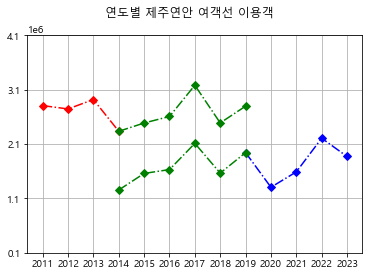

In [30]:
import matplotlib.pyplot as plt

# 시각화 2

fig2 = plt.figure()
fig2.suptitle("연도별 제주연안 여객선 이용객")
axes2 = fig2.add_subplot(111)

F7_1=F7.drop(F7.index[4:9]).reset_index(drop=True)
F7_2=F7.drop(F7.index[0:3]).reset_index(drop=True)
E7_1=E7.drop(E7.index[6:10]).reset_index(drop=True)
E7_2=E7.drop(E7.index[0:5]).reset_index(drop=True)

x=F7_1['연도']
x1=F7_2['연도']
x2=E7_1['연도']
x3=E7_2['연도']
y=F7_1['연안여객선']
y1=F7_2['연안여객선']
y2=E7_1['연안여객선']
y3=E7_2['연안여객선']

axes2.plot(x,y,color='r',marker='D',linestyle='dashdot')
axes2.plot(x1,y1,color='g',marker='D',linestyle='dashdot')
axes2.plot(x3,y3,color='b',marker='D',linestyle='dashdot')
axes2.plot(x2,y2,color='g',marker='D',linestyle='dashdot')


plt.yticks(range(100000,5000000,1000000))
plt.grid(True)
plt.savefig ('년도별 제주연안 여객선 이용객2.png')
plt.show()

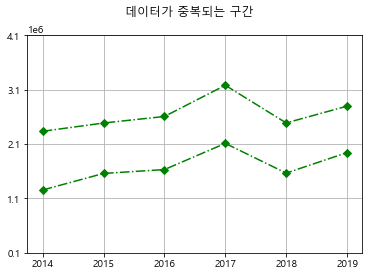

상관계수: 0.96
P-value: 0.0027
                            OLS Regression Results                            
Dep. Variable:                 graph2   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     44.21
Date:                Thu, 29 Aug 2024   Prob (F-statistic):            0.00266
Time:                        10:15:43   Log-Likelihood:                -76.278
No. Observations:                   6   AIC:                             156.6
Df Residuals:                       4   BIC:                             156.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.846e+05   3

C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


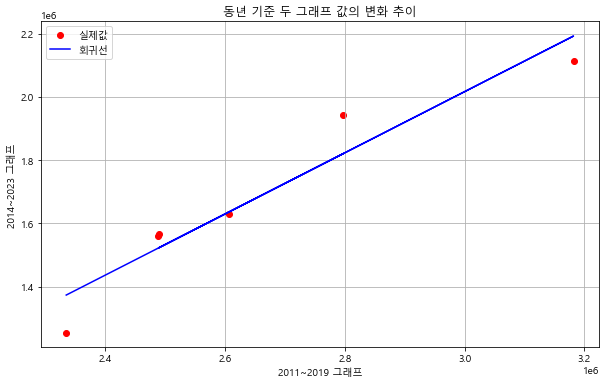

In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


# 비교를 위한 두 데이터프레임의 중복년도만 남기기

F8=F7.drop(F7.index[0:3]).reset_index(drop=True)
E8=E7.drop(E7.index[6:10]).reset_index(drop=True)

# # 시각화

fig2 = plt.figure()
fig2.suptitle("데이터가 중복되는 구간")
axes2 = fig2.add_subplot(111)

x=F8['연도']
x1=E8['연도']
y=F8['연안여객선']
y1=E8['연안여객선']

axes2.plot(x,y,color='g',marker='D',linestyle='dashdot')
axes2.plot(x1,y1,color='g',marker='D',linestyle='dashdot')

plt.yticks(range(100000,5000000,1000000))
plt.grid(True)
plt.savefig ('여객선 이용객 중복 구간.png')
plt.show()


# 중복되는 년도의 단일선형회귀로 상관성 추출

data2 = {
    'graph1': [2335213, 2487715, 2607630, 3181825, 2489249, 2797526],
    'graph2': [1255261, 1560073, 1630941, 2112974, 1566178, 1943010]
}

df2 = pd.DataFrame(data2)

x= df2['graph1']
y = df2['graph2']

print('상관계수: {:.2f}'.format(stats.pearsonr(x,y)[0])) # 상관계수: 0.96
print('P-value: {:.4f}'.format(stats.pearsonr(x,y)[1])) # 0.0003

# 가설 검증
x2= sm.add_constant(x) # 절편 만들기 

m2 = sm.OLS(y, x2).fit()

print(m2.summary())

# # 한글 폰트
# font_path='NanumGothic.ttf' 
# font_name=font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font_name) 

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(df2['graph1'], df2['graph2'], color='red', label='실제값')
plt.plot(df2['graph1'], m2.fittedvalues, color='blue', label='회귀선')
plt.xlabel('2011~2019 그래프')
plt.ylabel('2014~2023 그래프')
plt.title('동년 기준 두 그래프 값의 변화 추이')
plt.legend()
plt.grid(True)
plt.savefig ('동년 기준 두 그래프의 값의 변화 추이.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


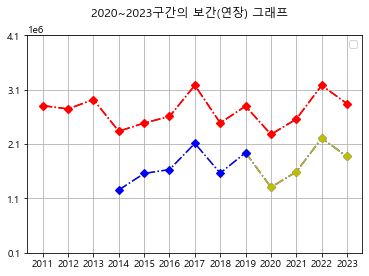

In [32]:
# 높은 상관계수는 두 변수 간에 등차적인 선형 관계가 강하게 존재한다는 것을 암시

# 차의 평균값 구하기

r=F8['연안여객선'].subtract(E8['연안여객선'], fill_value=0)
lnum=int(r.sum()/len(r)) # 971786

# 겹치는 구간의 차의 평균값으로 2011~2019 그래프에서 2020~2023 연도를 보간(연장)

F7.loc[10]=E7.loc[7,'연안여객선']+lnum
F7.loc[11]=E7.loc[8,'연안여객선']+lnum
F7.loc[12]=E7.loc[9,'연안여객선']+lnum
F7.loc[13]=E7.loc[10,'연안여객선']+lnum
F7.loc[10,'연도']='2020'
F7.loc[11,'연도']='2021'
F7.loc[12,'연도']='2022'
F7.loc[13,'연도']='2023'

# 시각화
fig2 = plt.figure()
fig2.suptitle("2020~2023구간의 보간(연장) 그래프")
axes2 = fig2.add_subplot(111)
x=F7['연도']
y=F7['연안여객선']

F7_1=F7.drop(F7.index[4:9]).reset_index(drop=True)
F7_2=F7.drop(F7.index[0:3]).reset_index(drop=True)
E7_1=E7.drop(E7.index[6:10]).reset_index(drop=True)
E7_2=E7.drop(E7.index[0:5]).reset_index(drop=True)


x2=E7_1['연도']
x3=E7_2['연도']
y2=E7_1['연안여객선']
y3=E7_2['연안여객선']

axes2.plot(x,y,color='r',marker='D',linestyle='dashdot')
axes2.plot(x3,y3,color='b',marker='D',linestyle='dashdot')
axes2.plot(x2,y2,color='y',marker='D',linestyle='dashdot')


axes2.plot(x,y,color='r',marker='D',linestyle='dashdot')
axes2.plot(x3,y3,color='y',marker='D',linestyle='dashdot')
axes2.plot(x2,y2,color='b',marker='D',linestyle='dashdot')

plt.yticks(range(100000,5000000,1000000))
plt.grid(True) 
plt.legend()
plt.savefig ('2020~2023구간의 보간 그래프.png')
plt.show()

In [33]:
# 연안여객선 이용객수와 항공편 결항률간 상관관계


data2 = {
    '항공편 결항률': [0.413, 1.013, 0.291, 0.762, 0.437, 1.017, 0.149,
                0.873, 0.856, 0.627, 0.726, 0.766, 1.049],
    '여객선 이용자수': [2807643, 2746394, 2919362, 2335213, 2487715, 
                 2607630, 3181825, 2489249, 2797526, 2277531, 2560073, 3179381, 2843529]
}

df2 = pd.DataFrame(data2)

x= df2['항공편 결항률']
y = df2['여객선 이용자수']

print('상관계수: {:.2f}'.format(stats.pearsonr(x,y)[0])) # 상관계수: -0.28
print('P-value: {:.4f}'.format(stats.pearsonr(x,y)[1]))  # 0.3543

# 가설 검증
x2= sm.add_constant(x) # 절편 만들기 

m2 = sm.OLS(y, x2).fit()

print(m2.summary())


# 상관계수: -0.28
# 가설 기각 : 결항률과 선박이용객수간 상관관계 없음

상관계수: -0.28
P-value: 0.3543
                            OLS Regression Results                            
Dep. Variable:               여객선 이용자수   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.9351
Date:                Thu, 29 Aug 2024   Prob (F-statistic):              0.354
Time:                        10:15:44   Log-Likelihood:                -180.73
No. Observations:                  13   AIC:                             365.5
Df Residuals:                      11   BIC:                             366.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.901e+06   

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


선박 이용객 수 모델 R² 값: 0.009045519131343216
비행기 이용객 수 모델 R² 값: 0.3866421135131233


C:\Users\user\AppData\Local\Temp\ipykernel_10552\3583123061.py:58: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_10552\3583123061.py:60: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig ('선박 이용객 수 잔차 분석.png')
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


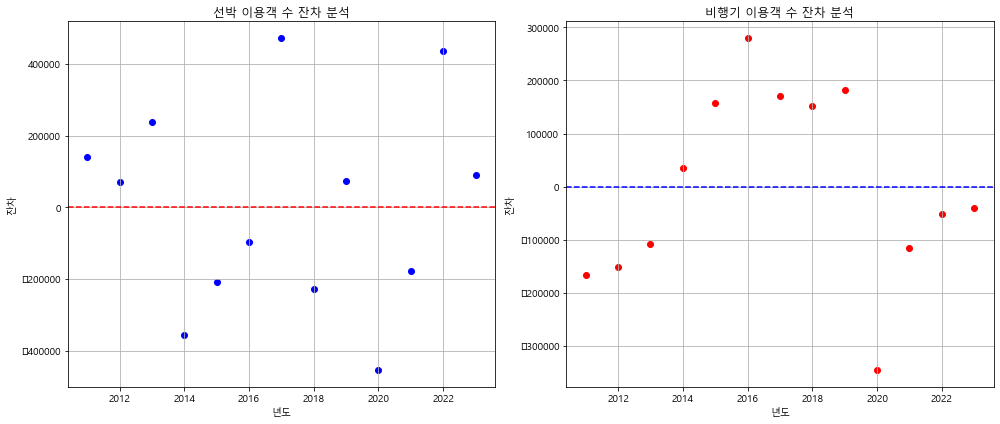

In [34]:
# 선박 이용객 수와 항공편 운행 수요 선형 예측을 위한 R²값 산출 (선형 예측 부적합)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 데이터 예시 (2011~2023년 이용객 수)
years = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
air_passengers = np.array([1081680, 1132120, 1212460, 1393710, 1552530, 1711170, 1639230, 1657350, 1723290, 1232300, 1498500, 1600500, 1648520])
ship_passengers = np.array([2807643, 2746394, 2919362, 2335213, 2487715, 2607630, 3181825, 2489249, 2797526, 2277531, 2560073, 3179381, 2843529])

# 선형 회귀 모델 생성 및 학습
model_ship = LinearRegression()
model_air = LinearRegression()

# 데이터를 2차원 배열로 변환
years_reshaped = years.reshape(-1, 1)

# 모델 학습
model_ship.fit(years_reshaped, ship_passengers)
model_air.fit(years_reshaped, air_passengers)

# 예측
predicted_ship_passengers = model_ship.predict(years_reshaped)
predicted_air_passengers = model_air.predict(years_reshaped)

# R² 값 출력
print("선박 이용객 수 모델 R² 값:", model_ship.score(years_reshaped, ship_passengers))
print("비행기 이용객 수 모델 R² 값:", model_air.score(years_reshaped, air_passengers))

# 잔차 분석
residuals_ship = ship_passengers - predicted_ship_passengers
residuals_air = air_passengers - predicted_air_passengers


y_min = min(ship_passengers.min(), air_passengers.min())
y_max = max(ship_passengers.max(), air_passengers.max())

plt.figure(figsize=(14, 6))

# 선박 잔차 플롯
plt.subplot(1, 2, 1)
plt.scatter(years, residuals_ship, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('년도')
plt.ylabel('잔차')
plt.grid(True) 
plt.title('선박 이용객 수 잔차 분석')

# 비행기 잔차 플롯
plt.subplot(1, 2, 2)
plt.scatter(years, residuals_air, color='red')
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('년도')
plt.ylabel('잔차')
plt.title('비행기 이용객 수 잔차 분석')

plt.tight_layout()
plt.grid(True) 
plt.savefig ('선박 이용객 수 잔차 분석.png')
plt.show()

# 선박 이용객 수 모델 R² 값: 0.009045519131343216
# 비행기 이용객 수 모델 R² 값: 0.3866421135131233
## 따라서 선형 예측 부적합 

선박 이용객 수 모델 R² 값: 0.009045519131343216
예측된 선박 이용객 수 (2024~2028년): [2759132.         2766117.10989011 2773102.21978022 2780087.32967033
 2787072.43956044]


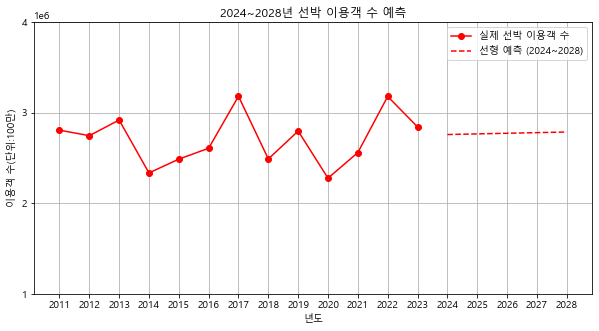

In [35]:
# 선박 이용객에 대한 선형 예측 (실패)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 데이터 예시 (2011~2023년 이용객 수)
years = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
ship_passengers = np.array([2807643, 2746394, 2919362, 2335213, 2487715, 2607630, 3181825, 2489249, 2797526, 2277531, 2560073, 3179381, 2843529])

# 선형 회귀 모델 생성 및 학습
model_ship = LinearRegression()

# 데이터를 2차원 배열로 변환
years_reshaped = years.reshape(-1, 1)

# 모델 학습
model_ship.fit(years_reshaped, ship_passengers)

# R² 값 출력
print("선박 이용객 수 모델 R² 값:", model_ship.score(years_reshaped, ship_passengers))

# 예측: 2024~2028년
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_ship_passengers = model_ship.predict(future_years)

# 예측 결과 출력
print("예측된 선박 이용객 수 (2024~2028년):", predicted_ship_passengers)

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(years, ship_passengers, 'ro-', label='실제 선박 이용객 수')
plt.plot(future_years, predicted_ship_passengers, 'r--', label='선형 예측 (2024~2028)')
plt.xticks(np.arange(2011, 2029, 1))
plt.yticks(range(1000000,5000000,1000000))
plt.xlabel('년도')
plt.ylabel('이용객 수(단위:100만)')
plt.title('2024~2028년 선박 이용객 수 예측')
plt.grid(True)  
plt.legend()
plt.savefig ('2024~2028년 선박 이용객 수 예측.png')
plt.show()

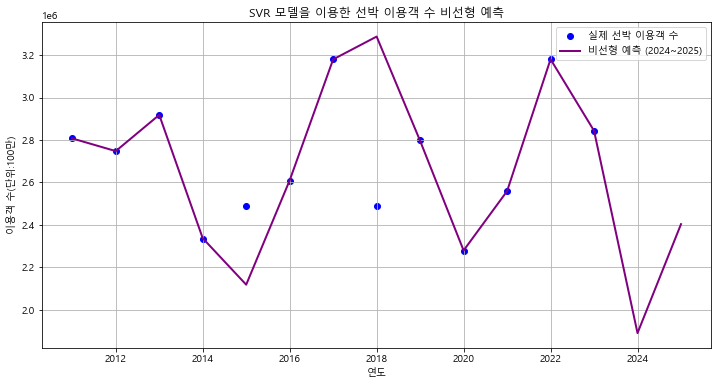

In [36]:
# SVR 모델을 이용한 선박 이용객 수 비선형 예측
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 데이터 정의
years = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]).reshape(-1, 1)
ship_passengers = np.array([2807643, 2746394, 2919362, 2335213, 2487715, 2607630, 3181825, 2489249, 2797526, 2277531, 2560073, 3179381, 2843529])

# 데이터 스케일링
scaler_x = StandardScaler()
scaler_y = StandardScaler()
years_scaled = scaler_x.fit_transform(years)
ship_passengers_scaled = scaler_y.fit_transform(ship_passengers.reshape(-1, 1)).flatten()

# SVR 모델 적합
svr_model = SVR(kernel='rbf', C=100000, epsilon=0.001)
svr_model.fit(years_scaled, ship_passengers_scaled)

# 예측할 연도 범위 설정 (2024년부터 2025년까지)
future_years_scaled = scaler_x.transform(np.arange(2011, 2026).reshape(-1, 1))
future_predictions_scaled = svr_model.predict(future_years_scaled)
future_predictions = scaler_y.inverse_transform(future_predictions_scaled.reshape(-1, 1)).flatten()

# 시각화
plt.figure(figsize=(12, 6))

# 원본 데이터와 SVR 결과 시각화
plt.scatter(years, ship_passengers, color='blue', label='실제 선박 이용객 수')
plt.plot(np.arange(2011, 2026), future_predictions, color='purple', label='비선형 예측 (2024~2025)', linewidth=2)
plt.title('SVR 모델을 이용한 선박 이용객 수 비선형 예측')
plt.xlabel('연도')
plt.ylabel('이용객 수(단위:100만)')
plt.legend()
plt.grid(True)
plt.savefig ('SVR모델 선박 이용객 수 예측.png')
plt.show()

10:15:46 - cmdstanpy - INFO - Chain [1] start processing
10:15:46 - cmdstanpy - INFO - Chain [1] done processing


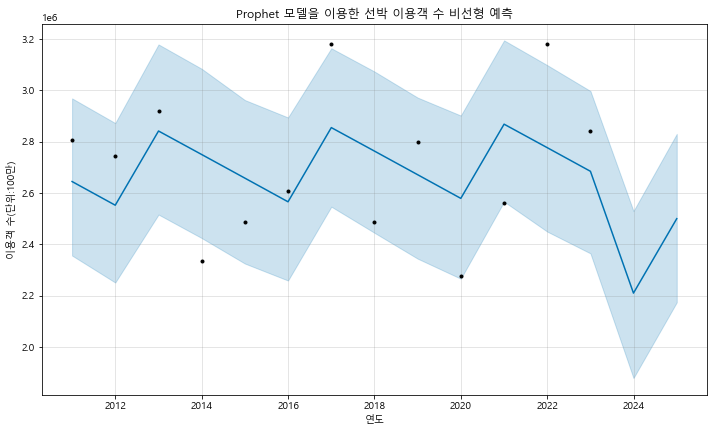

In [37]:
# Prophet 모델을 이용한 선박 이용객 수 비선형 예측 
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# 데이터 정의
years = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
ship_passengers = np.array([2807643, 2746394, 2919362, 2335213, 2487715, 2607630, 3181825, 2489249, 2797526, 2277531, 2560073, 3179381, 2843529])

# 데이터프레임 생성
df = pd.DataFrame({
    'ds': pd.to_datetime(years.astype(str)),  # 'ds'는 날짜형 칼럼
    'y': ship_passengers  # 'y'는 예측할 값
})

# Prophet 모델 생성
model = Prophet()
model.fit(df)

# 예측할 연도 범위 설정 (2024년부터 2025년까지)
future = model.make_future_dataframe(periods=2, freq='Y')  # 'Y'는 연 단위

# 예측
forecast = model.predict(future)

# 결과 시각화
fig = model.plot(forecast)
plt.title('Prophet 모델을 이용한 선박 이용객 수 비선형 예측')
plt.xlabel('연도')
plt.ylabel('이용객 수(단위:100만)')
plt.grid(True)
plt.savefig ('Prophet모델 선박 이용객 수 예측.png')
plt.show()

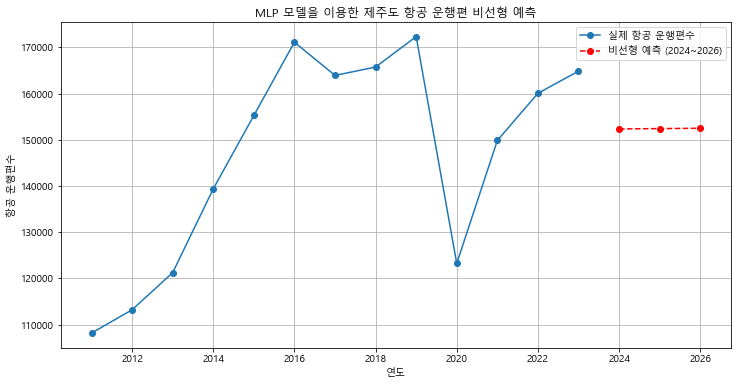

In [38]:
# MLP 모델을 이용한 제주도 항공 운행편 비선형 예측 (실패)
import pandas as pd
import numpy as np

# 주어진 데이터를 DataFrame으로 변환
data_dict = {
    'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Value': [108168, 113212, 121246, 139371, 155253, 171117, 163923, 165735, 172329, 123230, 149850, 160050, 164852]
}

df = pd.DataFrame(data_dict)

# 'Year' 컬럼을 날짜 형식으로 변환 (각 연도의 1월 1일로 설정)
df['ds'] = pd.to_datetime(df['Year'].astype(str) + '-01-01')
df['y'] = df['Value']

# 인공신경망 (MLP) 예측
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 준비
X = df[['Year']].values
y = df['Value'].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구축
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', max_iter=1000)
mlp.fit(X_train, y_train)

# 예측
future_years = np.arange(2024, 2027).reshape(-1, 1)
y_pred = mlp.predict(future_years)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Value'], label='실제 항공 운행편수', marker='o')
plt.plot(future_years, y_pred, label='비선형 예측 (2024~2026)', marker='o', linestyle='--', color='red')
plt.xlabel('연도')
plt.ylabel('항공 운행편수')
plt.title('MLP 모델을 이용한 제주도 항공 운행편 비선형 예측')
plt.legend()
plt.grid()
plt.savefig ('MLP모델 이용한 제주 항공편 예측.png')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10552\2340355450.py:25: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + c) + d
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


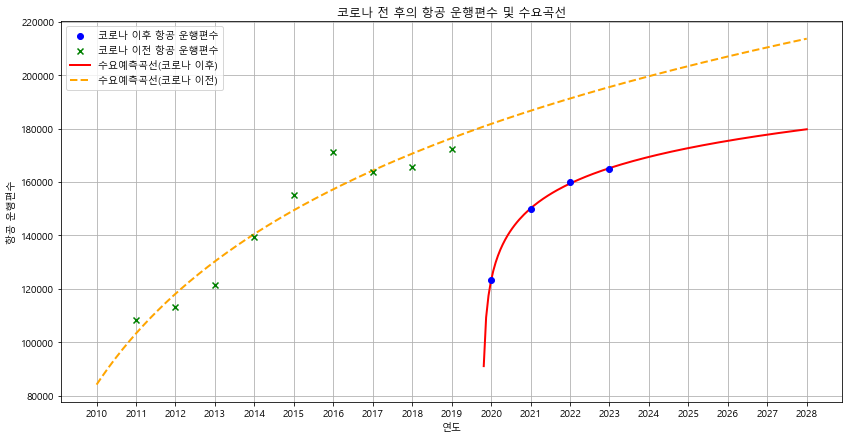

In [39]:
# 비선형 예측모델을 이용하기보다 코로나를 기점으로 변동되었다는 정보를 수용하여
# 2020~ 2023년간 데이터의 변화율과 이전 2011~2019 년도의 데이터를 나누어 분석
# 로그함수꼴 그래프를 이용한 미래 항공편 수요 예측
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 2011~ 2019 (코로나 이후 데이터)
data = {
    'Year': [2020, 2021, 2022, 2023],
    'Value': [123230, 149850, 160050, 164852]
}
df = pd.DataFrame(data)

# 2020~ 2023 (코로나 이전 데이터)
additional_data = {
    'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Value': [108168, 113212, 121246, 139371, 155253, 171117, 163923, 165735, 172329]
}
df_additional = pd.DataFrame(additional_data)

# 로그 함수 정의
def log_func(x, a, b, c, d):
    return a * np.log(b * x + c) + d

X = df['Year'].values
y = df['Value'].values
X_add = df_additional['Year'].values
y_add = df_additional['Value'].values

# 로그 함수 피팅
popt, _ = curve_fit(log_func, X, y, p0=[1, 1, 1, 1])
popt_add, _ = curve_fit(log_func, X_add, y_add, p0=[1, 1, 1, 1])

# 예측 범위 설정 (2028년까지)
X_pred = np.linspace(min(X_add) - 1, 2028, 300)
y_pred = log_func(X_pred, *popt)
y_pred_add = log_func(X_pred, *popt_add)

# 시각화
plt.figure(figsize=(14, 7))

plt.scatter(X, y, color='blue', label='코로나 이후 항공 운행편수', zorder=5)
plt.scatter(X_add, y_add, color='green', marker='x', label='코로나 이전 항공 운행편수', zorder=5)

# 미래 수요예측을 위한 로그 함수
plt.plot(X_pred, y_pred, color='red', label='수요예측곡선(코로나 이후)', linewidth=2)
plt.plot(X_pred, y_pred_add, color='orange', linestyle='--', label='수요예측곡선(코로나 이전)', linewidth=2)

plt.xlabel('연도')
plt.ylabel('항공 운행편수')
plt.xticks(np.arange(2010, 2029, 1))
plt.title('코로나 전 후의 항공 운행편수 및 수요곡선')
plt.legend()
plt.grid()
plt.savefig ('코로나 전 후의 항공 운행편수 및 수요곡선.png')
plt.show()